## PCA, What is it for?

Principal component analysis (PCA) is a technique that is widely used for applications such as 
* dimensionality reduction
* lossy data compression
* feature extraction
* data visualization

There are two commonly used definitions of PCA, it can be defined as
* the orthogonal projection of the data onto a lower dimensional linear space, known as the principle subspace, such that the variance of the projected data is maximized (Hotelling, 1933)
* the linear projection that minimizes the average projection cost, defined as the mean squared distance between the data points and their projections (Pearson, 1901)


## So, what does Principal Component Analysis (PCA) do?

>PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle axis occurs first. (more important = more variance/more spread out data)



Bellow I will use [these notes](https://www.projectrhea.org/rhea/index.php/PCA_Theory_Examples)

## But first, we need some Linear Algebra knowledge

### Eigenvectors, Eigenvalues, and Singular Vector Decompositoin

Let define a n-by-n matrix A and a non-zero vector $\vec{x} \in \mathbb{R}^{n}$. If there exists a scalar value $\lambda$ which satisfies the vector equation

$$A \vec{x}=\lambda \vec{x}$$

we define $\lambda$ as an eigenvalue of the matrix $A$, and the corresponding non-zero vector $\vec{x}$ is called an eigenvector of the matrix A. To determine eigenvalues and eigenvectors a characteristic equation is used.

$$D(\lambda)=\operatorname{det}(A-\lambda I)$$

Find an example following the link given.

### Singular Vector Decomposition (SVD)

In the implementation of PCA, singular vector decomposition (SVD) is used to extract principal components (eiegenvectors) from a given data set. Given a n-by-m matrix A, a singular vector decomposition of A is expressed as:

$$A=U \Sigma V^{T}$$

where $U \in \mathbb{R}^{n \times n}, \Sigma \in \mathbb{R}^{n \times m}, V \in \mathbb{R}^{m \times m} .$ The matrix U and $\mathrm{V}$
are orthogonal matrices, and consist of left and right singular vectors respectively. The matrix $\Sigma$ is diagonal and consists of non-negative singular values $\sigma_{i} .$ The singular values are placed in $\Sigma$ in descending
order such as

$$\sigma_{1} \geq \sigma_{2} \geq \cdots \geq \sigma_{p} \geq 0 \text { where } p=\min (n, m)$$

## The PCA algorithm

Assume that we are given by a m-by-n data matrix X consists of n number of m-dim vectors $\vec{x}_{i} \in \mathbb{R}^{m}$

**Preprocess Data**

1. Let $\bar{x}=\frac{1}{n} \sum_{i=1}^{n} \vec{x}_{i}$
2. Replace each $x_{i}$ with $x_{i}-\bar{x}$
3. Let $\sigma_{j}^{2}=\frac{1}{n} \sum_{i}\left(\vec{x}^{j}_{i}\right)^{2}$
4. Replace each $x^{j}_{i}$ with $x^{j}_{i} / \sigma_{j}$

**Step 1: Compute mean and covariance of data matrix**

The covariance matrix of $\mathrm{X}$ is called $S \in \mathbb{R}^{m \times m}$ and defined by

$$
S=\frac{1}{n} \sum_{i=1}^{n}\left(\vec{x}_{i}-\bar{x}\right)\left(\vec{x}_{i}-\bar{x}\right)^{T}
$$

where $\bar{x} \in \mathbb{R}^{m}$ is the mean of each row in $\mathrm{X}$ and defined by

$$
\bar{x}=\frac{1}{n} \sum_{i=1}^{n} \vec{x}_{i}
$$



**Step 2: SVD**

Singular vector decomposition of S is implemented to extract principal components and directions:

$$S=U \Sigma V^{T}$$

where $U \in \mathbb{R}^{n \times n}, \Sigma \in \mathbb{R}^{n \times m}, V \in \mathbb{R}^{m \times m} .$ In the implementation, we use
the matrix $\left[u_{1} u_{2} \cdots u_{m}\right]$ where a vector $u_{i} \in \mathbb{R}^{m}$ represents a principal component direction.

**Step 3: Projection**

The data matrix $X$ can be projected into a new matrix $Y \in \mathbb{R}^{k \times m}$ by
multiplying a matrix $P^{T}$

$$
Y=P^{T} X
$$

where $P=\left[u_{1} u_{2} \cdots u_{k}\right], k \leq m .$ Proper number of principal components $k$ should be selected in prior to perform projection of data matrix.

## Some Examples

![1](../Images/PCA_Ex_1_raw.png)
![2](../Images/PCA_Ex_1_rotated.png)
![3](../Images/PCA_Ex_1_primary.png)
![4](../Images/PCA_Ex_1_secondary.png)

Literature

* Eigenvalues and Eigenvectors visual explanation https://www.youtube.com/watch?v=PFDu9oVAE-g
* Interactive visualization of Eigenvectors https://setosa.io/ev/eigenvectors-and-eigenvalues/
* Interactive visualization of PCA https://setosa.io/ev/principal-component-analysis/
* Interactive visualization of PCA and more https://projector.tensorflow.org/
* The greatest lectures of Linear Algebra by Gilbert Strang https://www.youtube.com/watch?v=TX_vooSnhm8&list=PLE7DDD91010BC51F8&index=31 (find the other ones in the right corner, it is a "playlist" of lectures)
* PCA with eigen-decomposition https://medium.com/@aptrishu/understanding-principle-component-analysis-e32be0253ef0
* Notes on PCA and related Linear Algebra https://www.projectrhea.org/rhea/index.php/PCA_Theory_Examples
* Andrew NG Notes http://cs229.stanford.edu/notes/cs229-notes10.pdf

## Examples

In [1]:
# imports

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mnist import MNIST

### Image Compressing

In [2]:
# read an image and take one channel

dali = plt.imread("../Images/dali.jpg")
print(dali.shape)
im = np.delete(dali,obj=dali[:,:], axis=2).squeeze(axis=2)
print(im.shape)

(1600, 1293, 3)
(1600, 1293)


/home/taguhi/.virtualenvs/base/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  """


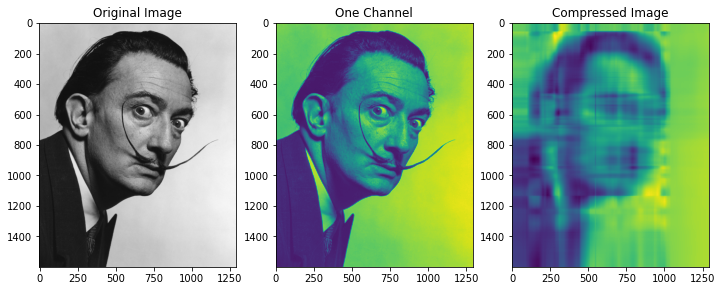

In [4]:
# fit PCA with 5 components and reconstruct the image

pca = PCA(n_components=5)
X_tr = pca.fit_transform(im)
X_inv = pca.inverse_transform(X_tr)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
axes[0].imshow(dali)
axes[0].set_title("Original Image")
axes[1].imshow(im)
axes[1].set_title("One Channel")
axes[2].imshow(X_inv)
axes[2].set_title("Compressed Image");


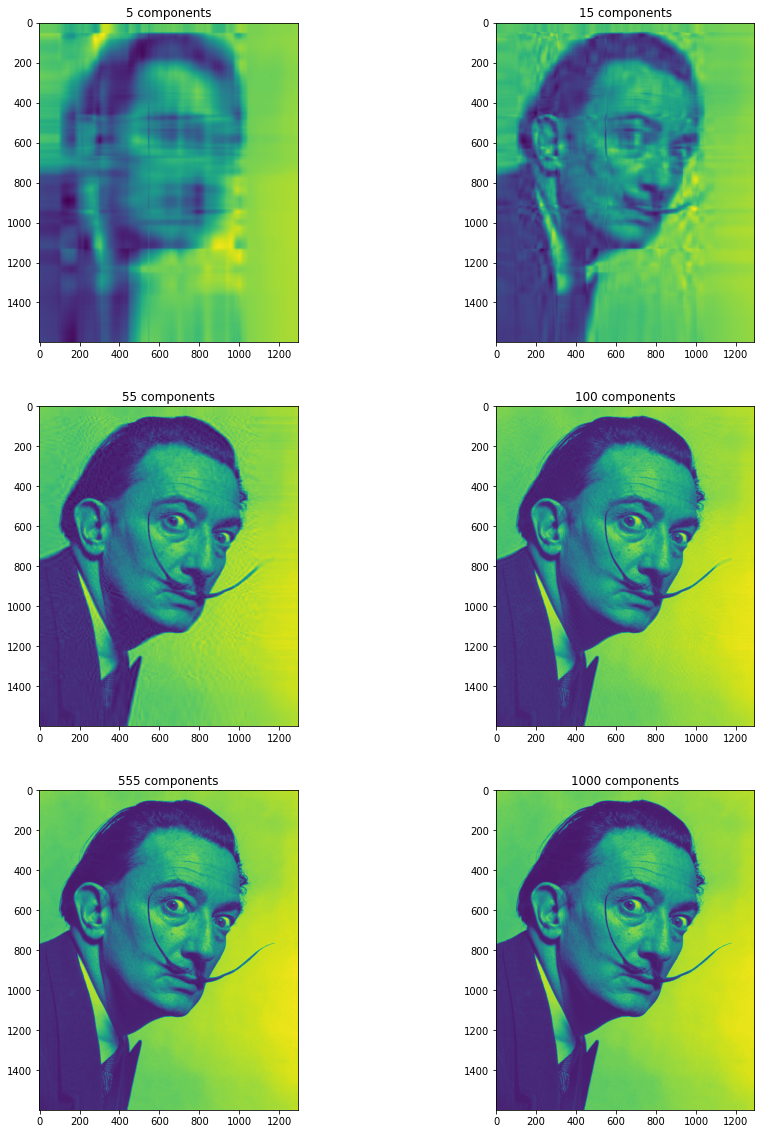

In [4]:
# try different n_components

n_comps = [5, 15, 55, 100, 555, 1000]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
for ax,i,n_comp in zip(axes.flatten(),range(len(n_comps)), n_comps):
    pca = PCA(n_components=n_comp)
    X_tr = pca.fit_transform(im)
    X_inv = pca.inverse_transform(X_tr)
    ax.imshow(X_inv)
    ax.set_title("{} components".format(n_comp))

### Principal Components for MNIST

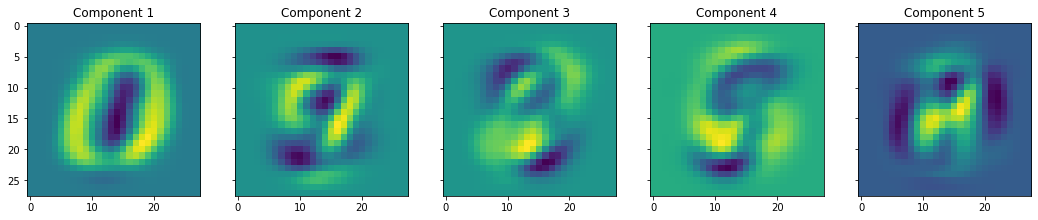

In [5]:
mndata = MNIST('../Data/')
images, labels = mndata.load_training()
all_data = np.array(images)

P = PCA(5)
P.fit(all_data)

# some code here